<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## Guided Practice: Explore Python Data Visualization

_Authors: Alexander Combs (New York City), Dave Yerrington (San Francisco), and Kevin Markham (Washington, D.C.)_

---

In this guided practice lab you will use Pandas, Matplotlib, and Seaborn to create simple plots.

We'll cover plotting line plots, scatter plots, bar plots, and histograms, and how to manipulate the style of your plots with Matplotlib.

## Learning Objectives

- Practice using different types of plots.
- Use Pandas methods for plotting.
- Create line plots, bar plots, histograms, and box plots.
- Know when to use Seaborn or advanced Matplotlib

### Introduction

In this lab, we will introduce how plotting works in Pandas and Matplotlib. Pandas uses Matplotlib behind the scenes for plotting, so you can use pandas to create a plot and then use Matplotlib to fine-tune it.

Toward the end of the lab, we will introduce a plotting library called Seaborn that is built on top of Matplotlib and go into more detail on how Matplotlib works.

### Pandas Plotting Documentation

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

In [1]:
from IPython.display import HTML

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Create fake data for examples.

In [2]:
df = pd.DataFrame(data=np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

### Choosing the right type of visualization

![Chart Suggestions](./assets/images/chart_suggestions.png)

### Load in data sets for visualization examples.

The Boston data dictionary can be found [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [3]:
# Read in the Boston housing data.
housing_csv = './datasets/boston_housing_data.csv'
housing = pd.read_csv(housing_csv)

# Read in the drinks data.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters_alcohol', 'continent']
drinks_csv = './datasets/drinks.csv'
drinks = pd.read_csv(drinks_csv, header=0, names=drink_cols, na_filter=False)

# Read in the ufo data.
ufo = pd.read_csv('./datasets/ufo.csv')
ufo.loc[:, 'Time'] = pd.to_datetime(ufo.Time)
ufo.loc[:, 'Year'] = ufo.Time.dt.year

<a id="line-plots"></a>
## Line plots: Show the trend of a numerical variable over time


In [4]:
# Count the number of ufo reports each year and sort the result by year
ufo_counts = ufo.loc[:, 'Year'].value_counts()

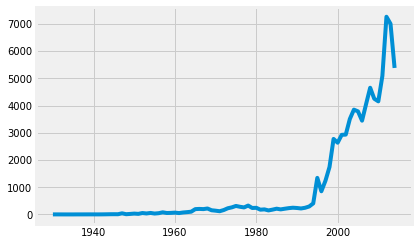

In [5]:
# Create a line plot of the number of UFO sightings over time
fig, ax = plt.subplots()
ufo_counts.sort_index().plot(ax=ax);
# sorting by year

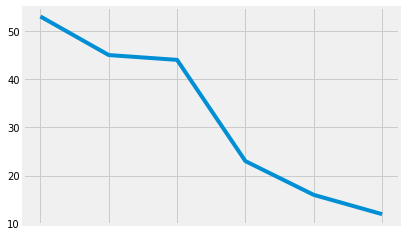

In [6]:
# Use the drinks dataset to create a line plot showing the number of countries
# per continent.
fig, ax = plt.subplots()
drinks.loc[:, 'continent'].value_counts().plot(ax=ax);

The plot above doesn't make much sense. Why not?

line plot is a bad choice, there are categorial, we should be doing bar plot


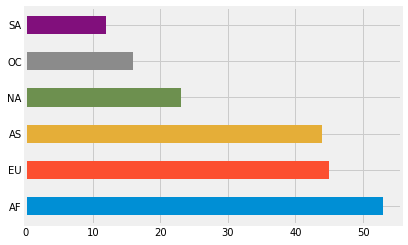

In [7]:
# Plot the same data as a (horizontal) bar plot -- a much better choice!
fig, ax = plt.subplots()
drinks.loc[:, 'continent'].value_counts().plot(kind='barh', ax=ax);
# barh -> is bar horizontal plot

### Line Plot With a `DataFrame`

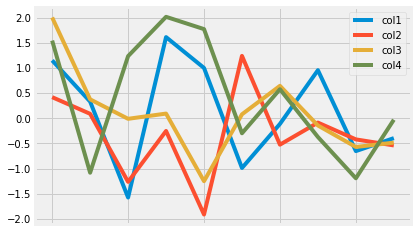

In [8]:
fig, ax = plt.subplots()
df.plot(ax=ax);

### How to change the size of a plot

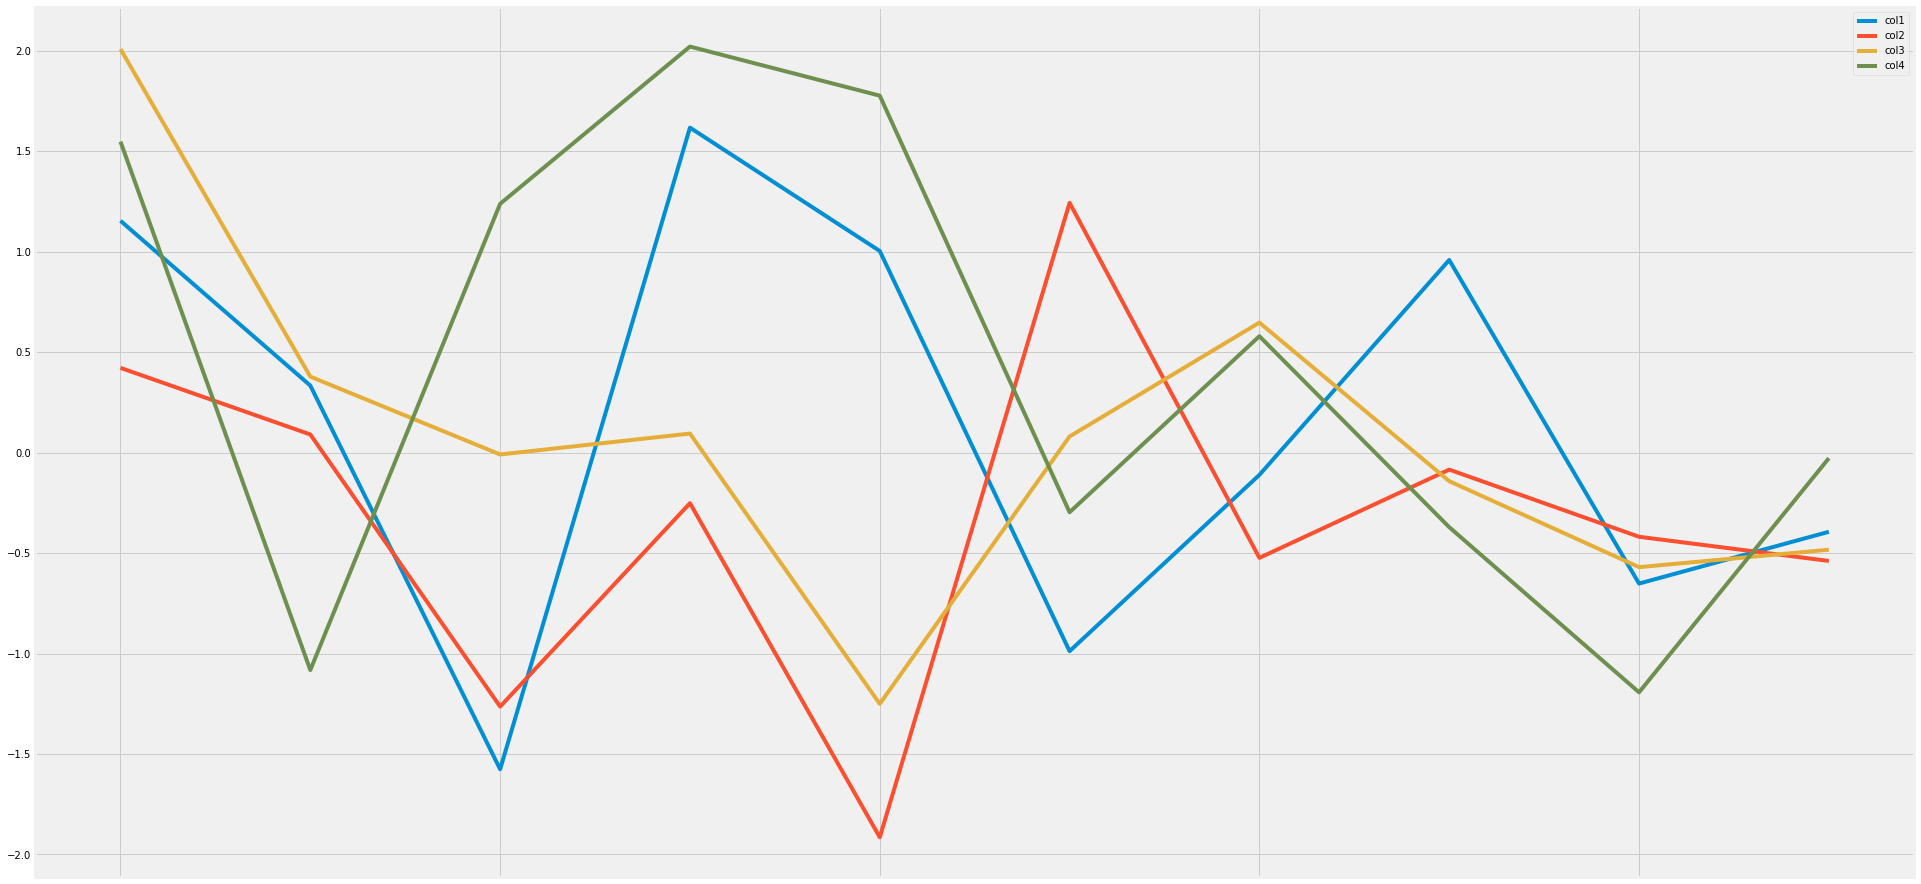

In [9]:
# Set figure size to 15in x 8in (for printing)
fig, ax = plt.subplots(figsize=(30,16))
df.plot(ax=ax);

### How to change the color of a plot

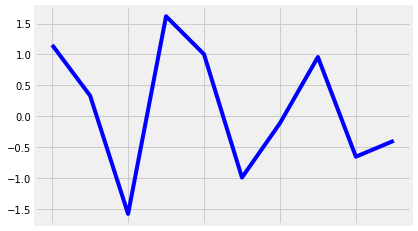

In [10]:
fig, ax = plt.subplots()
df.loc[:, 'col1'].plot(color='blue', ax=ax);

### How to change the style of individual lines

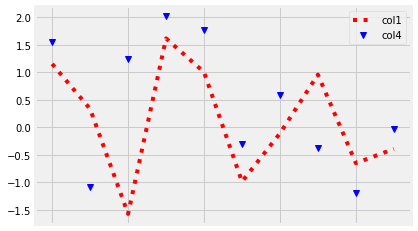

In [11]:
# : - dotted line, v - triangle_down
# r - red, b - blue
fig, ax = plt.subplots()
df.loc[:, ['col1', 'col4']].plot(ax=ax, style={'col1': ':r', 'col4': 'vb'});

### Exercise: Create a line plot of `ZN` and `INDUS` in the housing data. 

- For `ZN`, use a solid green line. For `INDUS`, use a blue dashed line.
- Change the figure size to a width of 12 and height of 8.
- Change the style sheet to something you find [here](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

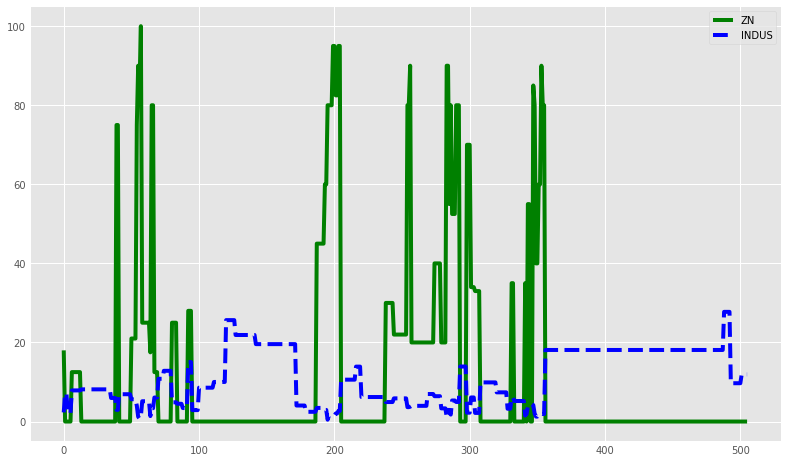

In [55]:
#housing.head(5)
fig, ax = plt.subplots(figsize=(12,8))
housing.loc[:, ['ZN', 'INDUS']].plot(ax=ax, style={'ZN': 'g', 'INDUS': '--b'});

<a id="bar-plots"></a>
## Bar Plots: Show a numerical comparison across different categories
---

In [56]:
# Calculate the mean drink amounts for each continent by category.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


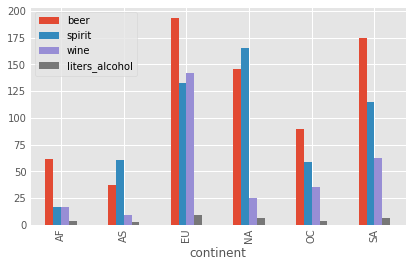

In [57]:
# Display these numbers in side-by-side bar plots
fig, ax = plt.subplots()
drinks.groupby('continent').mean().plot(kind='bar', ax=ax);

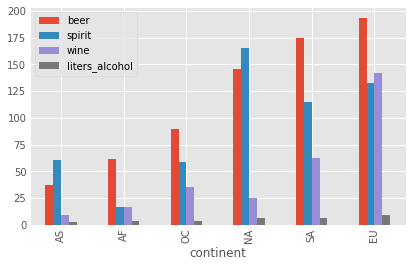

In [58]:
# Sort the continent x-axis by amount of beer consumed.
fig, ax = plt.subplots()
drinks.groupby('continent').mean().sort_values('beer').plot(kind='bar', ax=ax);

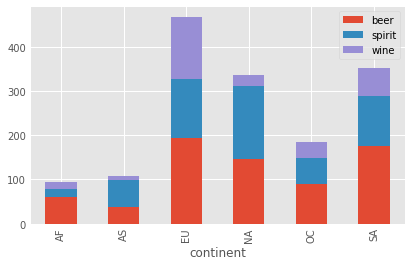

In [60]:
# Show the numbers for beer, wine, and spirits in a stacked bar plot
beer_spirit_wine = (
    drinks.groupby('continent').mean().drop('liters_alcohol', axis = 1)
)

fig, ax = plt.subplots()
beer_spirit_wine.plot(kind='bar', stacked=True, ax=ax);

### We can modify our plot by calling Matplotlib methods on `ax`

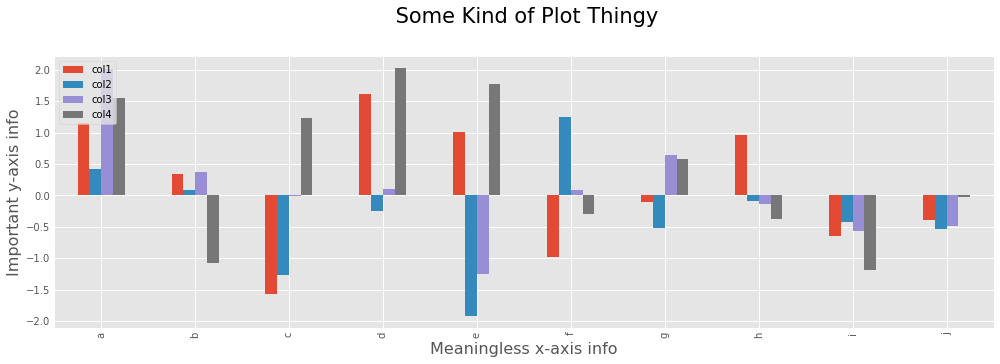

In [64]:
fig, ax = plt.subplots(figsize=(15,5))
df.plot(kind='bar', ax=ax);
ax.set_title(' Some Kind of Plot Thingy', fontsize=21, y=1.1);
ax.set_xlabel('Meaningless x-axis info', fontsize=16)
ax.set_ylabel('Important y-axis info', fontsize=16)
ax.legend(loc=2); #top left

### Exercise: Create a bar chart using `col1` and `col2`.

- Give the plot a large title of your choosing. 
- Move the legend to the lower-left corner.

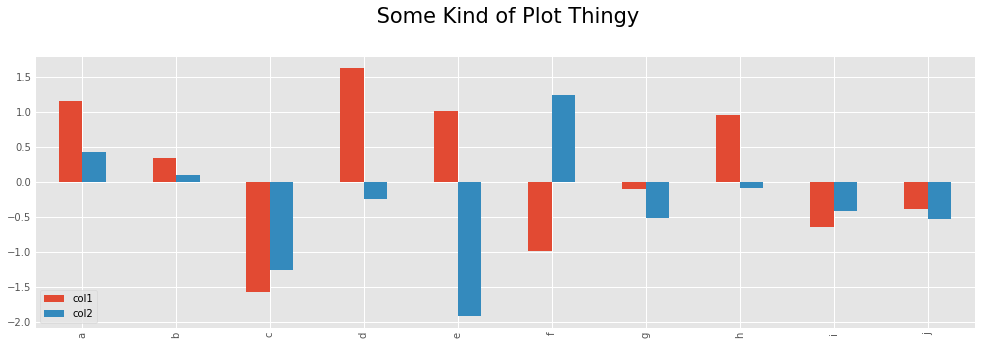

In [72]:
df.head(5)
fig, ax = plt.subplots(figsize=(15,5))
df.loc[:, ['col1', 'col2']].plot(kind='bar', ax=ax);
ax.set_title(' Some Kind of Plot Thingy', fontsize=21, y=1.1);
ax.legend(loc=3);

- Do the same thing but with horizontal bars.
- Move the legend to the upper-right corner.

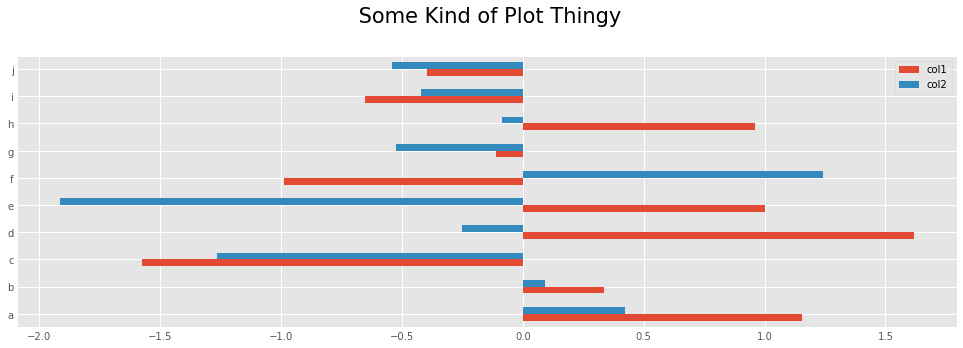

In [78]:
df.head(5)
fig, ax = plt.subplots(figsize=(15,5))
df.loc[:, ['col1', 'col2']].plot(kind='barh', ax=ax);
ax.set_title(' Some Kind of Plot Thingy', fontsize=21, y=1.1);
ax.legend(loc=1);

### Stacked works on horizontal bar charts.

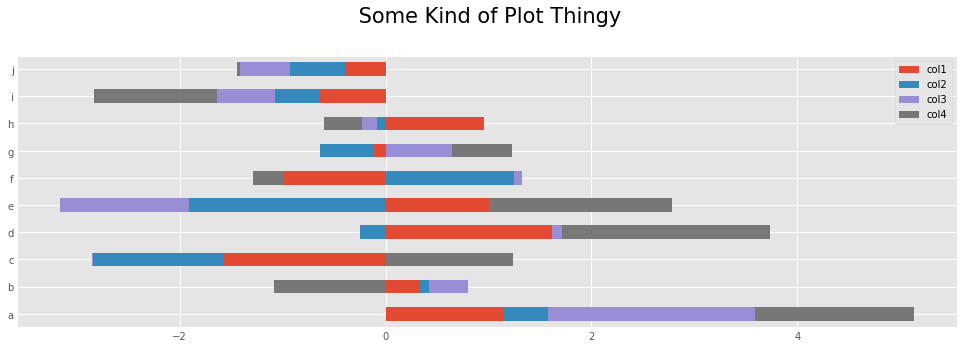

In [80]:
fig, ax = plt.subplots(figsize=(15,5))
df.plot(kind='barh', stacked=True, ax=ax);
ax.set_title(' Some Kind of Plot Thingy', fontsize=21, y=1.1);
ax.legend(loc=1);

<a id="histograms"></a>
## Histograms: Show the distribution of a numerical variable
---


In [81]:
# Sort values for the beer column
# bar graph is for showing frequency of categorical variable
# histogram is for numerical variable

drinks.loc[:, 'beer'].sort_values().values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   1,   1,   1,   1,   2,   3,   5,   5,   5,   5,   5,
         6,   6,   6,   6,   8,   8,   8,   9,   9,   9,   9,  12,  13,
        15,  15,  16,  16,  17,  18,  19,  19,  20,  20,  21,  21,  21,
        21,  22,  23,  25,  25,  25,  25,  26,  28,  31,  31,  31,  31,
        32,  32,  34,  36,  36,  36,  37,  42,  42,  43,  44,  45,  47,
        49,  51,  51,  52,  52,  52,  53,  56,  56,  57,  58,  60,  62,
        62,  63,  64,  69,  71,  76,  76,  77,  77,  77,  78,  79,  82,
        82,  85,  88,  89,  90,  92,  93,  93,  98,  99, 102, 105, 106,
       109, 111, 115, 120, 122, 124, 127, 128, 130, 133, 140, 142, 143,
       144, 147, 149, 149, 152, 157, 159, 162, 163, 167, 169, 171, 173,
       185, 188, 192, 193, 193, 194, 194, 196, 197, 199, 203, 206, 213,
       217, 219, 224, 224, 225, 230, 231, 233, 234, 236, 238, 240, 245,
       245, 247, 249, 251, 261, 263, 263, 270, 279, 281, 283, 28

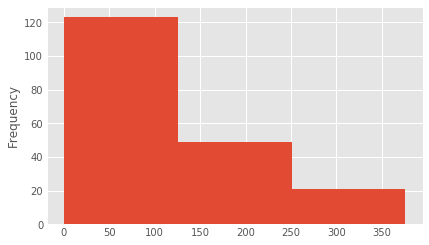

In [82]:
# Compare the above with histogram.
fig, ax = plt.subplots()
drinks.loc[:, 'beer'].plot(kind='hist', bins=3, ax=ax);

What information does the plot above provide?

bin has numerical value, divided into 3 bins and it shows that 120 countires have moderate / light drinkers

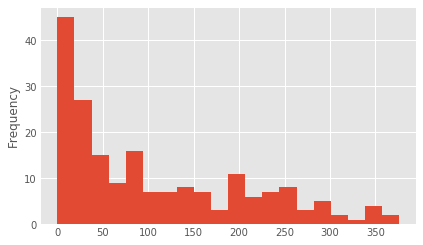

In [84]:
# Try more bins
fig, ax = plt.subplots()
drinks.loc[:, 'beer'].plot(kind='hist', bins=20, ax=ax);
# note with histogram you have to play around with bins to get good results

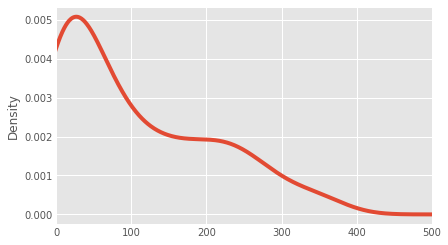

In [87]:
# Compare with density plot (smooth version of a histogram).
fig, ax = plt.subplots()
drinks.loc[:, 'beer'].plot(kind='density', xlim=(0, 500), ax=ax);

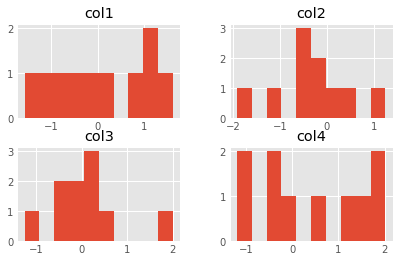

In [89]:
# Making histograms of DataFrames — histogram of random data
fig, ax = plt.subplots(nrows=2, ncols=2)
df.hist(ax=ax);

### Single Histogram

In [21]:
# Create normally distributed random data


In [22]:
# Get histogram of `norm`


### Challenge: Create a histogram with pandas for using `MEDV` in the housing data.
- Set the bins to 20.

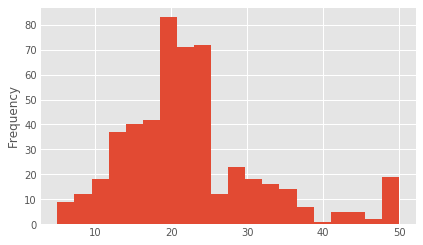

In [93]:
housing.head(5)
fig, ax = plt.subplots()
housing.loc[:, 'MEDV'].plot(kind='hist', bins=20, ax=ax);

<a id="grouped-histograms"></a>
### Grouped histograms: Show one histogram for each group.

In [23]:
# Reminder: Overall histogram of beer servings


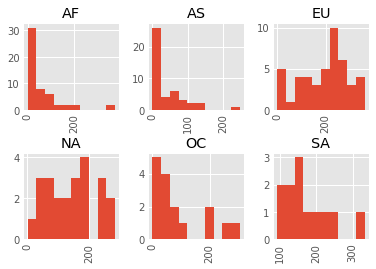

In [97]:
# Histogram of beer servings grouped by continent
fig, ax = plt.subplots(nrows=2, ncols=3)
drinks.hist(column='beer', by='continent', ax=ax);

How are the histograms above potentially misleading?

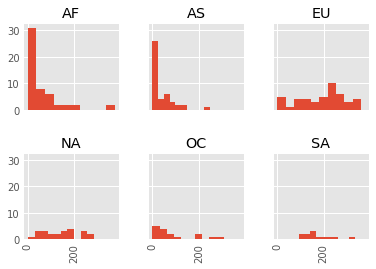

In [98]:
# Share the x- and y-axes.
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)
drinks.hist(column='beer', by='continent', ax=ax);

<a id="box-plots"></a>
## Box Plots: Show quartiles (and outliers) for one or more numerical variables
---

We can use boxplots to quickly summarize distributions.

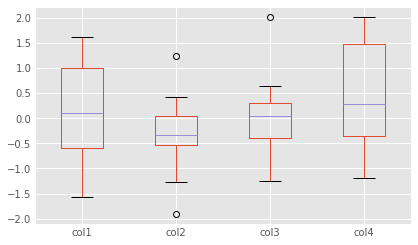

In [99]:
fig, ax = plt.subplots()
df.plot(kind='box', ax=ax);

**Five-number summary:**

- min = minimum value
- 25% = first quartile (Q1) = median of the lower half of the data
- 50% = second quartile (Q2) = median of the data
- 75% = third quartile (Q3) = median of the upper half of the data
- max = maximum value

**Interquartile Range (IQR)** = Q3 - Q1

**Outliers:**

- below Q1 - 1.5 * IQR
- above Q3 + 1.5 * IQR

Looking at the 25th and 75th percentiles is similar to looking at the numbers 1 stds below and above the mean, except that the 25th and 75th percentiles "mean the same thing" regardless of how the data is distributed.

In [103]:
# Show "five-number summary" for spirit.
drinks.loc[:, 'spirit'].describe()

count    193.000000
mean      80.994819
std       88.284312
min        0.000000
25%        4.000000
50%       56.000000
75%      128.000000
max      438.000000
Name: spirit, dtype: float64

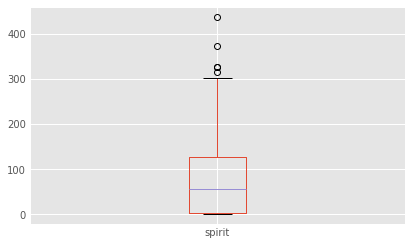

In [104]:
# Compare with box plot.
fig, ax = plt.subplots()
drinks.loc[:, 'spirit'].plot(kind='box', ax=ax);

In [28]:
# Include beer, spirits, and wine.


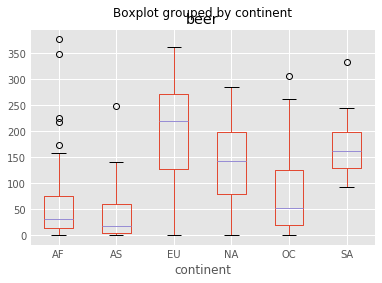

In [105]:
# Box plot of beer servings grouped by continent
fig, ax = plt.subplots()
drinks.boxplot(column='beer', by='continent', ax=ax);

In [30]:
# Box plot of all numeric columns grouped by continent


<a id="scatter-plots"></a>
## Scatter plots: Show the relationship between two numerical variables
---


In [107]:
# Select the beer and wine columns and sort by beer.
beer_wine = drinks.loc[:, ['beer', 'wine']].sort_values('beer')

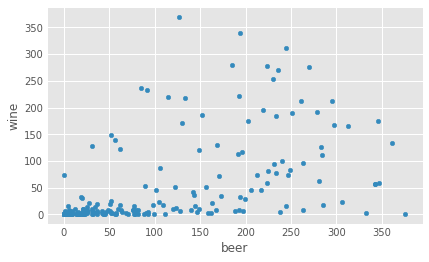

In [110]:
# Compare with scatter plot.
beer_wine.plot(kind='scatter', x='beer', y='wine');

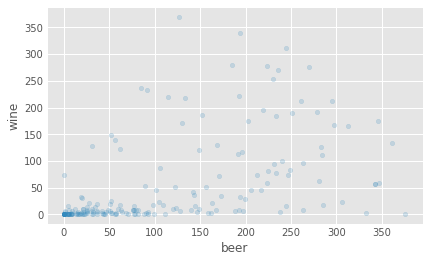

In [112]:
# Add transparency so that we can where points overlap
beer_wine.plot(kind='scatter', x='beer', y='wine', alpha=.2);

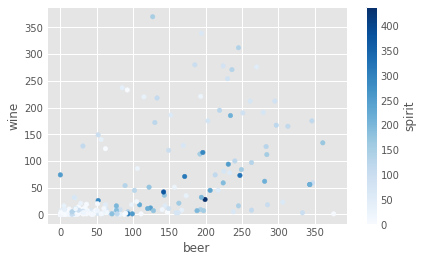

In [116]:
# Vary point color by spirit servings.
fig, ax = plt.subplots()
drinks.plot(kind='scatter', x='beer', y='wine', c='spirit', colormap='Blues', ax=ax);

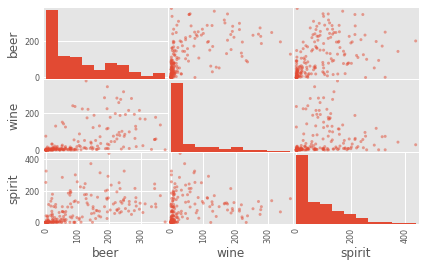

In [117]:
# Scatter matrix of three numerical columns
pd.plotting.scatter_matrix(drinks.loc[:, ['beer', 'wine', 'spirit']]);

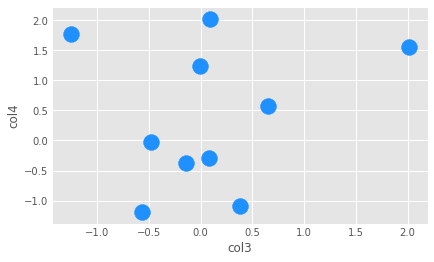

In [120]:
fig, ax = plt.subplots()
df.plot(x='col3', y='col4', kind='scatter', ax=ax, color='dodgerblue', s=250);

**Exercise:** Create a scatterplot of  `INDUS` against `ZN` for the housing data. Make the figure 14x8 in. with dark green size 100 markers.

### How to use a list comprehension to change the size of the scatter plot dots based on `DIS`

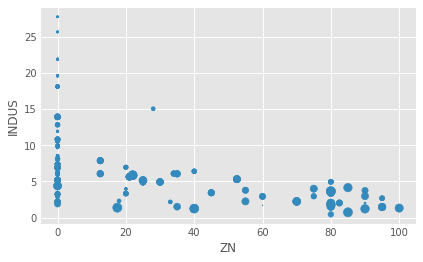

In [121]:
# This list comprehension sets the point sizes ('s') to be the squares of the values in housing['DIS']
sizes= [x**2 for x in housing.loc[:, 'DIS']]
sizes
fig, ax = plt.subplots()
housing.plot(x='ZN', y='INDUS', kind='scatter',
             s=sizes, ax = ax
            )

<a id="seaborn"></a>
## Seaborn `pairplot`

---

Simply importing Seaborn changes the look of your plots to use a grey background with sparse gridlines. (By default, Matplotlib uses a white background with no gridlines.)

Seaborn also provides many convenience methods.

### Compare Matplotlib `scatter_matrix` to Seaborn `pairplot`

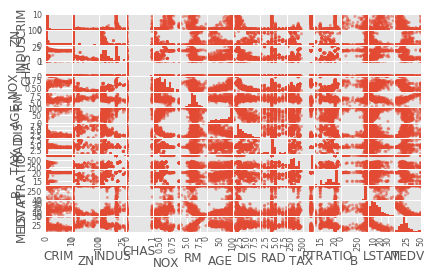

In [125]:
# scatter_matrix
pd.plotting.scatter_matrix(housing);

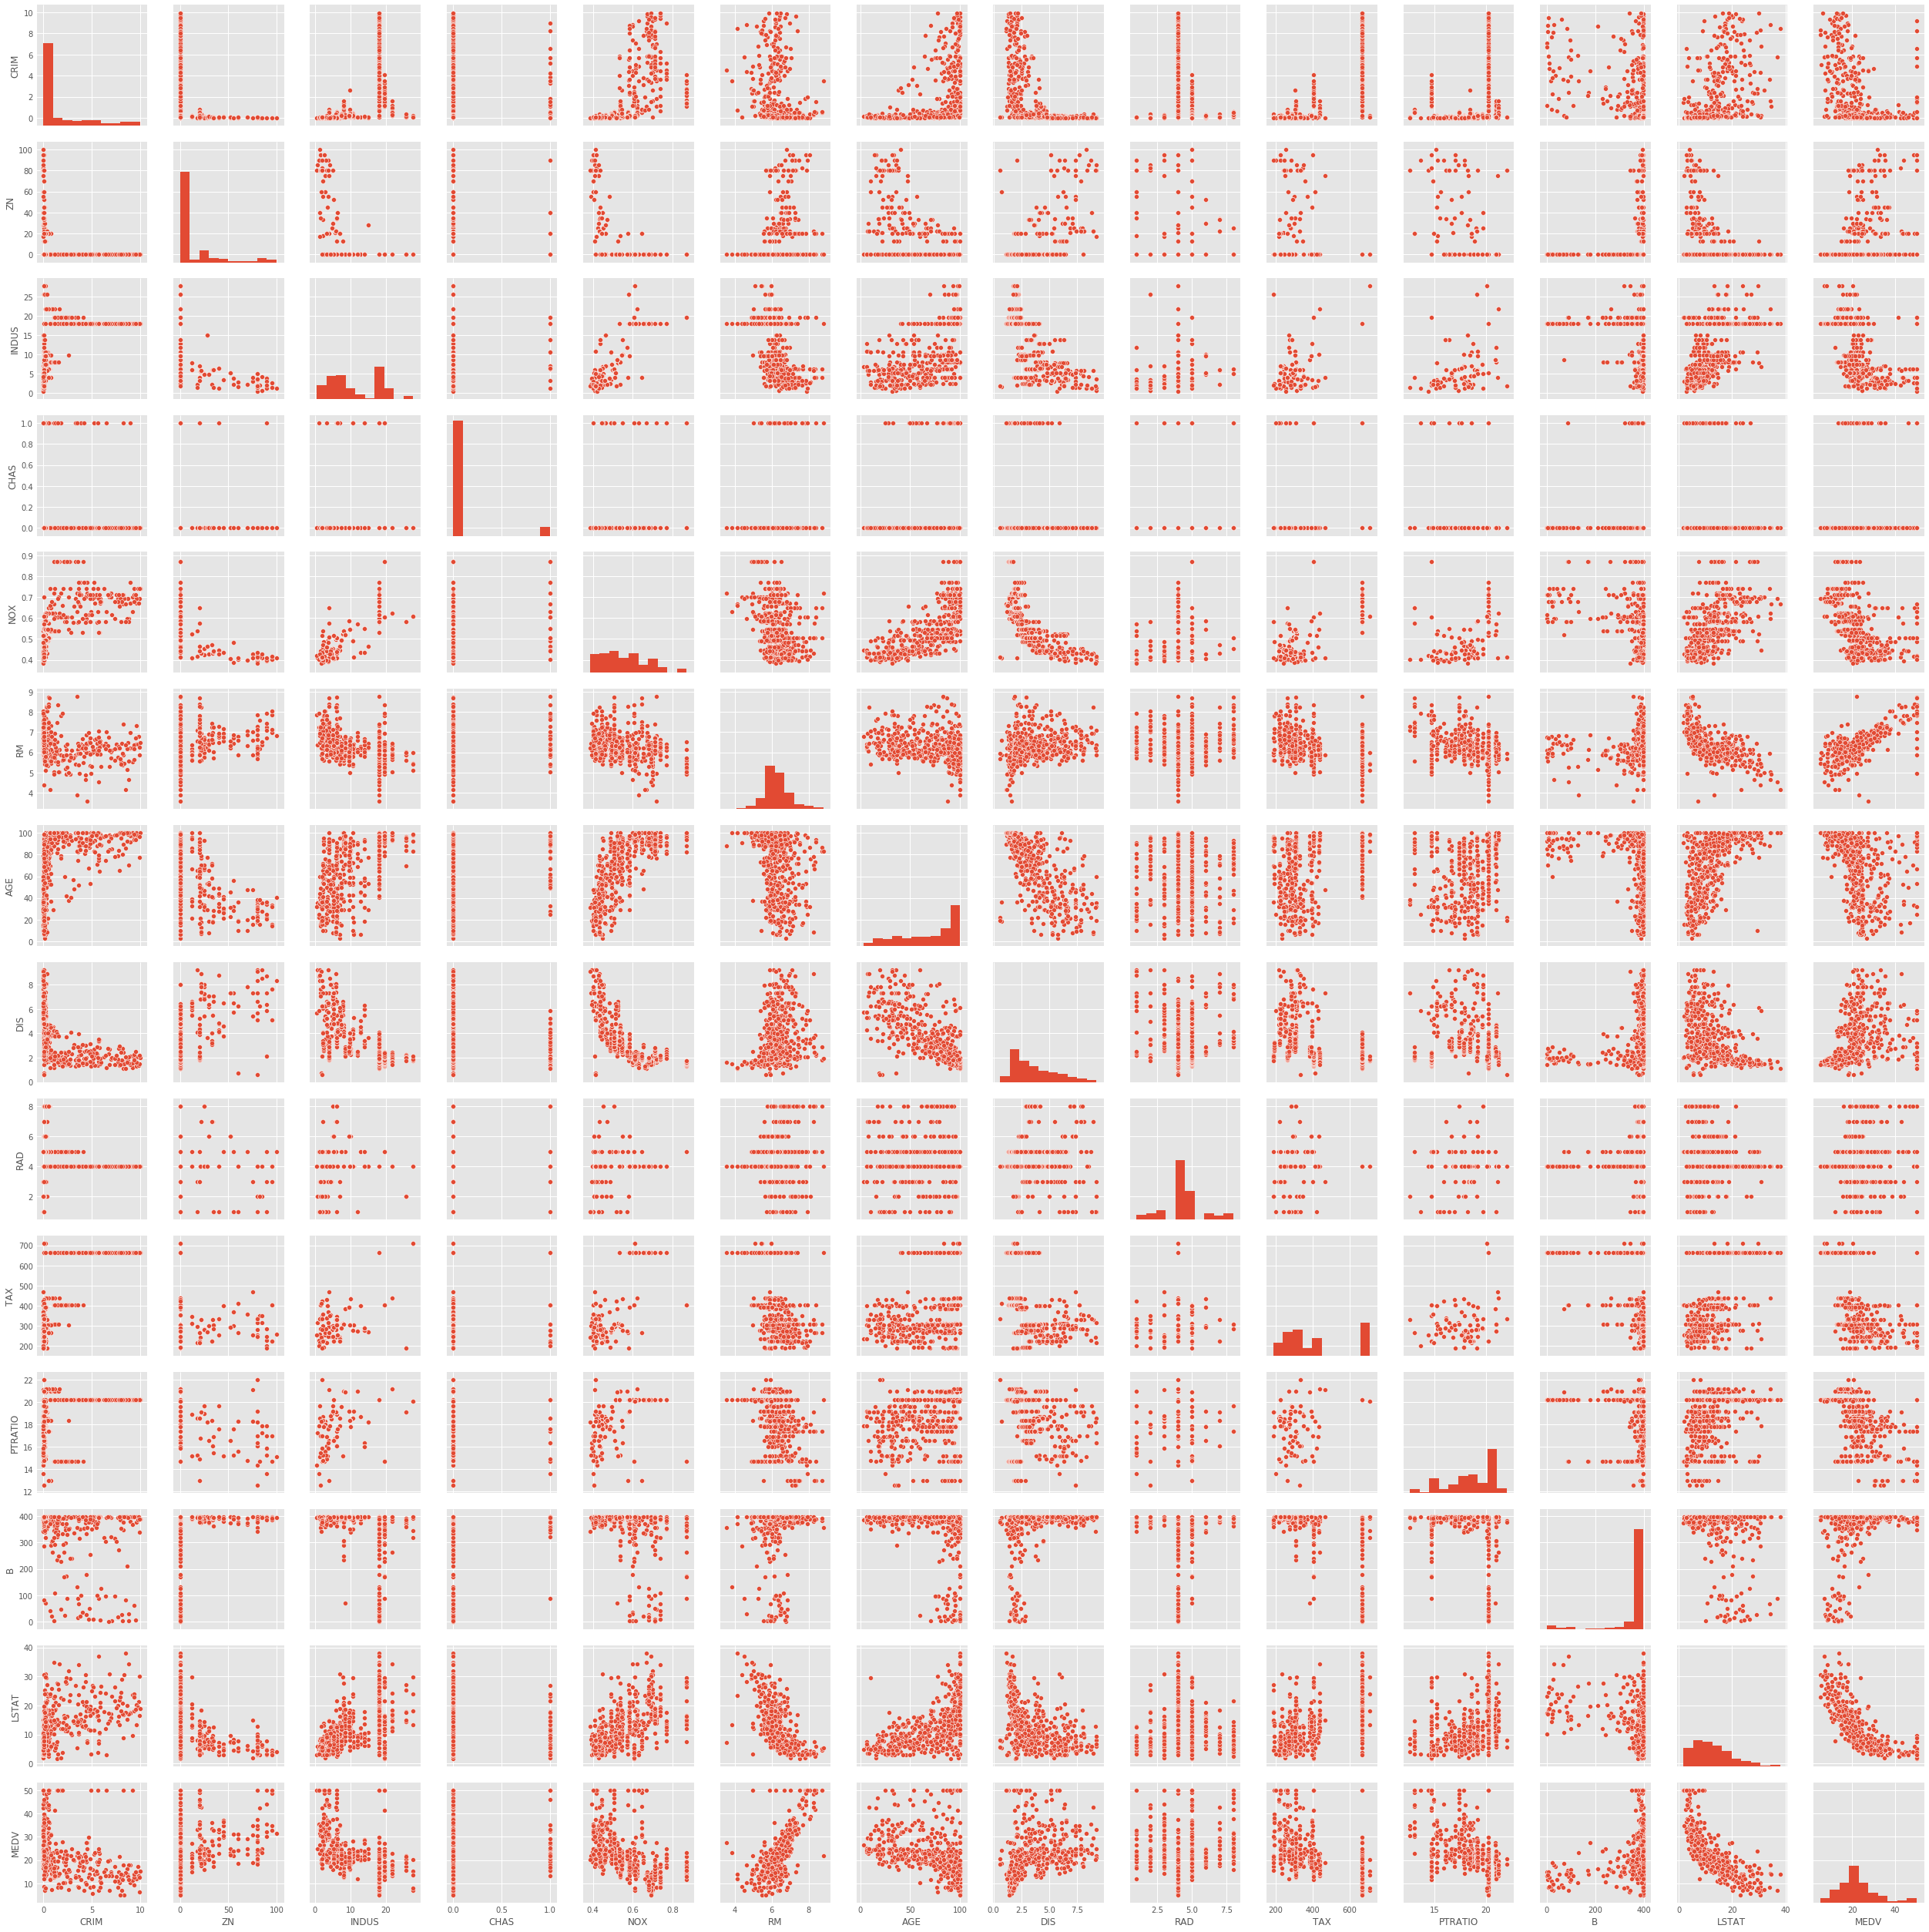

In [128]:
# pairplot
sns.pairplot(housing)

## Seaborn `heatmap`
---

When you have too many variables, a pairplot or scatter matrix can become impossible to read. We can still gauge linear correlation using a heatmap of the correlation matrix.

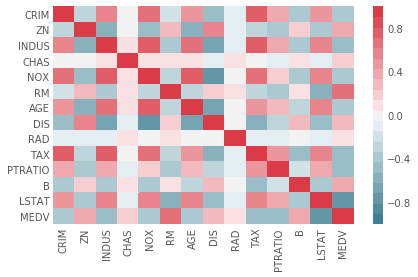

In [126]:
# Make a heatmap on the correlations between variables in the housing data:
fig, ax = plt.subplots()
sns.heatmap(housing.corr(), vmin=-1, vmax=1, 
            cmap=sns.diverging_palette(220, 10, n=21), ax=ax);

The scale used above is not ideal. How could we improve it?

In [40]:
# Heatmap with more appropriate colorscale


**Exercise.**

- Create a scatter plot of two heatmap entries that appear to have a very positive correlation.

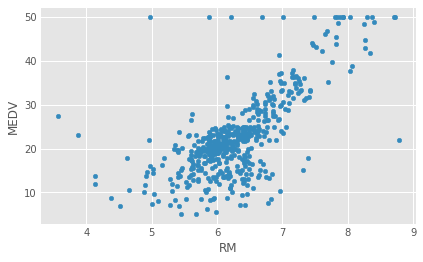

In [138]:
fig, ax = plt.subplots()
housing.plot(x='RM', y='MEDV', kind='scatter',ax = ax);

- Create a scatter plot of two heatmap entries that appear to have negative correlation.

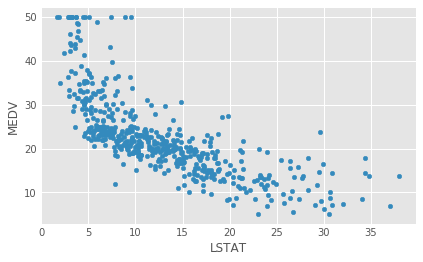

In [139]:
fig, ax = plt.subplots()
housing.plot(x='LSTAT', y='MEDV', kind='scatter',ax = ax);

<a id="matplotlib"></a>
## OPTIONAL: Understanding Matplotlib (Figures, Subplots, and Axes)

---

<img src="https://matplotlib.org/_images/anatomy.png" height="600" width="600">


From https://matplotlib.org/examples/showcase/anatomy.html

Matplotlib uses a blank canvas called a figure.

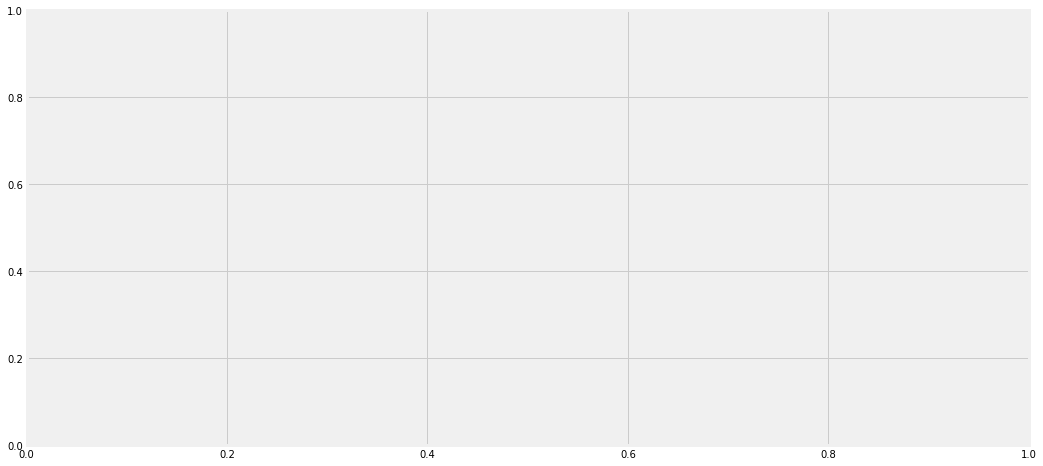

In [41]:
fig = plt.subplots(1, 1, figsize=(16,8));

Within this canvas, we can contain smaller objects called axes.

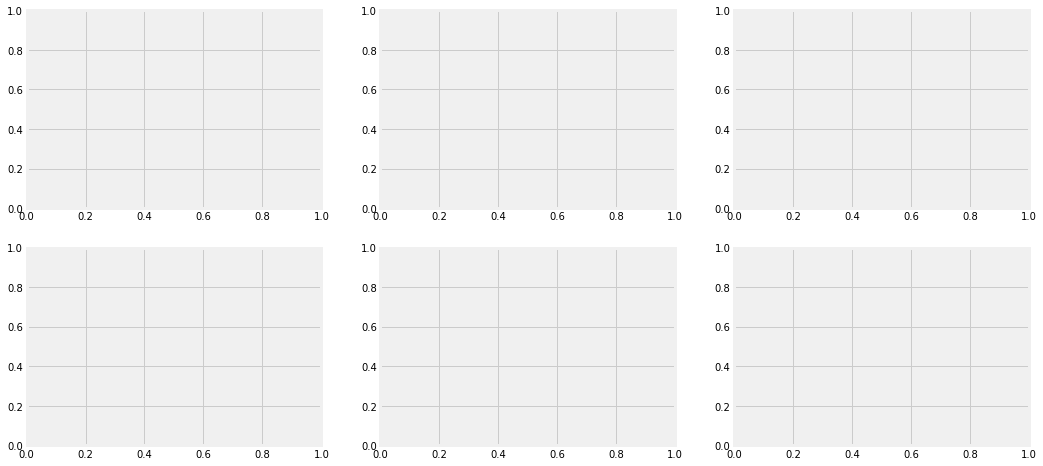

In [42]:
fig, axes = plt.subplots(2, 3, figsize=(16,8));

Pandas allows us to plot to a specified axes if we pass the object to the ax parameter.

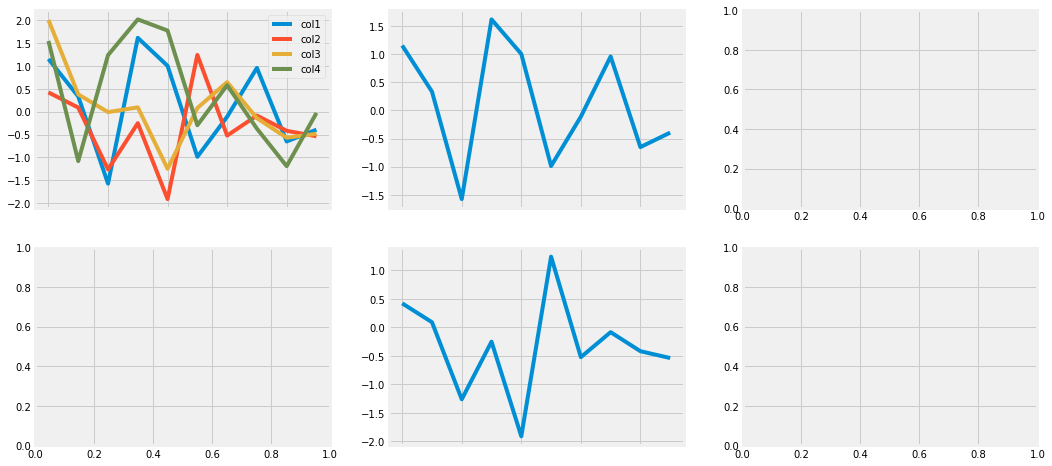

In [43]:
fig, axes = plt.subplots(2,3, figsize=(16,8))
df.plot(ax=axes[0][0]);
df['col1'].plot(ax=axes[0][1]);
df['col2'].plot(ax=axes[1][1]);

## Let's use a bit more customization.
---

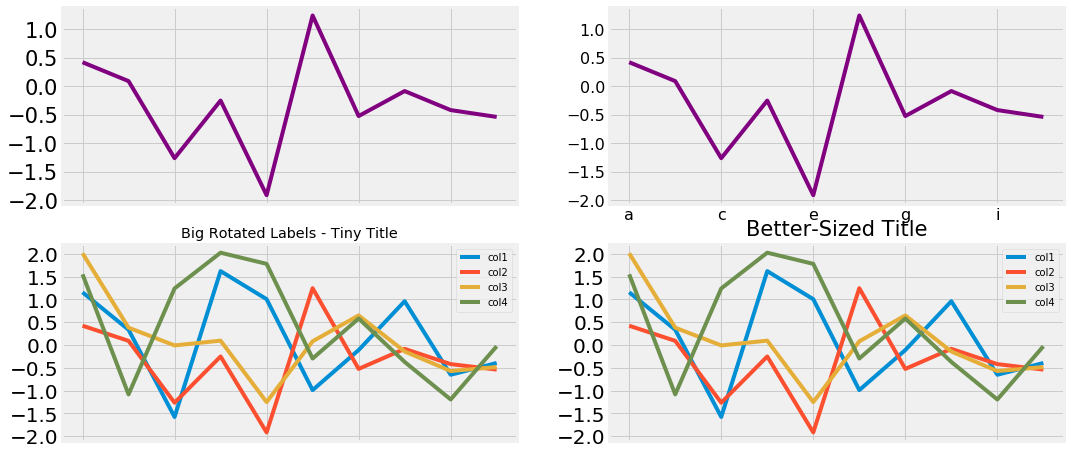

In [44]:
fig, axes = plt.subplots(2,2, figsize=(16,8))

# We can change the ticks' size.
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21, ax=axes[0][0])

# We can also change which ticks are visible.
# Let's show only the even ticks. ('idx % 2 == 0' only if 'idx' is even.)
ticks_to_show = [idx for idx in range(len(df['col2'].index)) if idx % 2 == 0]
df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16, ax=axes[0][1])

# We can change the label rotation.
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title',\
        fontsize=20, rot=-50, ax=axes[1][0])\

# We have to use ".set_title()" to fix title size.
df.plot(figsize=(16,8),
        fontsize=20,
        rot=-50,
        ax=axes[1][1],
        ).set_title('Better-Sized Title', fontsize=21, y=1.01);

<a id="additional-topics"></a>
## OPTIONAL: Additional Topics

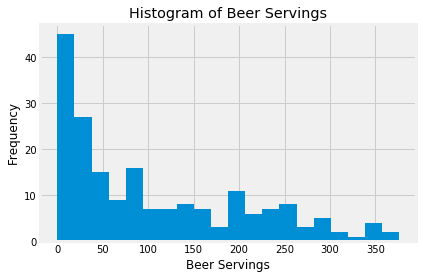

In [45]:
fig, ax = plt.subplots()
drinks.loc[:, 'beer'].plot(kind='hist', bins=20, title='Histogram of Beer Servings', ax=ax);
ax.set_xlabel('Beer Servings');
ax.set_ylabel('Frequency');

# Saving a plot to a file
fig.savefig('beer_histogram.png');    # Save to file!

In [46]:
# List available plot styles
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [47]:
# Change to a different style.
plt.style.use('ggplot')

<a id="summary"></a>
### Summary

In this lesson, we showed examples how to create a variety of plots using Pandas and Matplotlib. We also showed how to use each plot to effectively display data.

Do not be concerned if you do not remember everything — this will come with practice! Although there are many plot styles, many similarities exist between how each plot is drawn. For example, they have most parameters in common, and the same Matplotlib functions are used to modify the plot area.

We looked at:
- Line plots
- Bar plots
- Histograms
- Box plots
- Special seaborn plots
- How Matplotlib works

# Projects

Due Mon. 5/14:

- [Unit 2 Project](https://git.generalassemb.ly/chi-ds-8/unit2_project)
- [Final Project Pt 1](https://git.generalassemb.ly/chi-ds-8/final_project/blob/master/requirements.md#proposal)

# Questions?

# [Exit Tickets](https://docs.google.com/forms/d/e/1FAIpQLSfvZxGW3CHmZzIhNqz-5uzMeDTQHHDOH8G2ovTPbT5U6Q8KLA/viewform?usp=send_form)